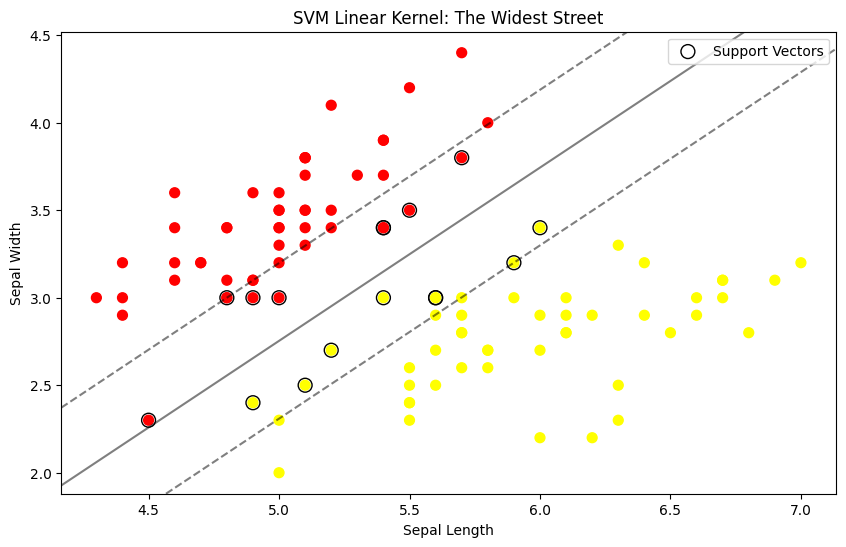

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. 加载数据 (只取两个特征，方便画平面图)
iris = datasets.load_iris()
X = iris.data[:, :2]  # 取前两个特征：花萼长度、花萼宽度
y = iris.target

# 只取两类花 (0和1)，变成二分类问题，方便理解
X = X[y != 2]
y = y[y != 2]

# 2. 训练 SVM 模型
# kernel='linear' 表示我们先画直的马路
# C=1.0 是惩罚系数，越小马路越宽，容错率越高
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 3. 高能预警：绘制决策边界和“马路” (Support Vectors)
plt.figure(figsize=(10, 6))

# 画散点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50)

# 画马路
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# 画出分界线(0) 和 边界线(-1, 1)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 圈出核心人物：支持向量 (Support Vectors)
# 决定马路在哪里的，只有这几个点，其他的点离得远，根本不重要！
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVM Linear Kernel: The Widest Street")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

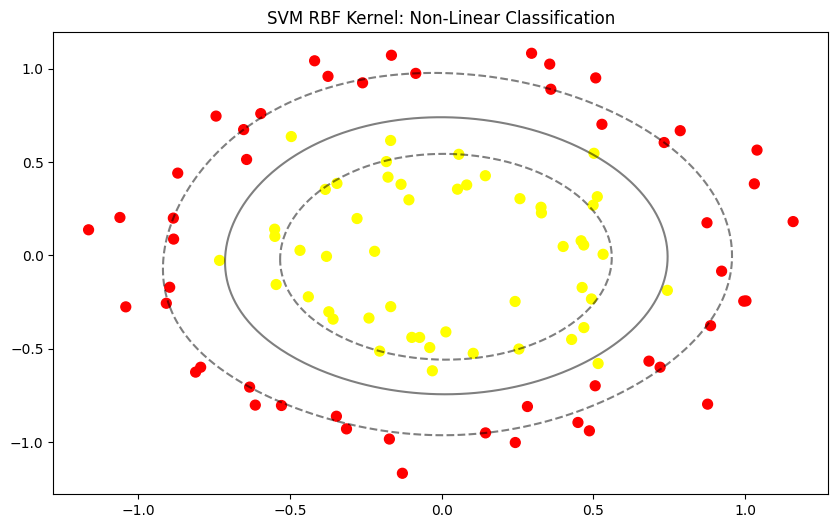

In [2]:
from sklearn.datasets import make_circles

# 1. 生成"煎蛋"数据 (环形数据)
# factor=0.5 表示内圈直径是外圈的一半
# noise=0.1 加点噪声，模拟真实情况
X_circle, y_circle = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# 2. 训练 SVM 模型 (这次用 RBF 核)
# kernel='rbf' (Radial Basis Function)
# gamma 参数控制"山峰"的尖锐程度：
#   - gamma 越大，只关注个别点，容易过拟合（模型太敏感）
#   - gamma 越小，覆盖范围越广
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_model.fit(X_circle, y_circle)

# 3. 可视化魔法
plt.figure(figsize=(10, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, cmap='autumn', s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100) # 采样点要多一点，不然曲线不平滑
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 计算分界线
Z = rbf_model.decision_function(xy).reshape(XX.shape)

# 画出非线性的边界！
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title("SVM RBF Kernel: Non-Linear Classification")
plt.show()